# Is PCA a good choice for normalization

Noah uses PCA to normalize (and reduce the dimensions of) his inputs and outputs. Here, I want to find out what it does to the variables. For example, I wonder how this changes the distributions, particularly of very skewed variables.

In [1]:
from cbrain.imports import *

Using TensorFlow backend.


In [3]:
DATADIR = '/local/S.Rasp/sp32fbp_andkua/'

In [4]:
!ls $DATADIR

AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-01.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-02.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-03.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-04.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-05.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-06.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-07.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-08.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-09.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-10.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-11.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0000-12.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0001-01.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h0.0001-02.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h1.0000-01-01-00000.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h1.0000-01-02-00000.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h1.0000-01-03-00000.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h1.0000-01-04-00000.nc
AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h1.0000-01-05-00000.nc
AndKua_aqua_SPCAM3.0_sp_

## Get some sample NetCDF file.

In [5]:
aqua = xr.open_dataset(DATADIR + 'AndKua_aqua_SPCAM3.0_sp_fbp32.cam2.h1.0000-01-02-00000.nc', decode_times=False)

In [6]:
aqua

<xarray.Dataset>
Dimensions:       (crm_x: 32, crm_y: 1, crm_z: 28, ilev: 31, isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7, lat: 64, lev: 30, lon: 128, tbnd: 2, time: 48)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon           (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * crm_x         (crm_x) float64 0.0 4.0 8.0 12.0 ... 112.0 116.0 120.0 124.0
  * crm_y         (crm_y) float64 0.0
  * crm_z         (crm_z) float64 992.6 976.3 957.5 936.2 ... 38.27 24.61 14.36
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 ... 900.0 900.0 900.2
  * time          (time) float64 1.0 1.021 1.042 1.062 ... 1.938 1.958 1.979


### Check the distributions of some variables

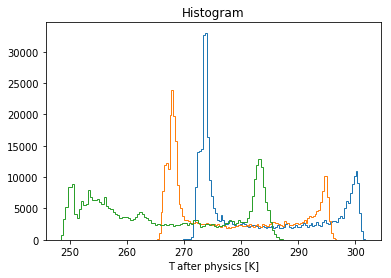

In [41]:
aqua.TAP.isel(lev=29).plot(bins=100, histtype='step');
aqua.TAP.isel(lev=25).plot(bins=100, histtype='step');
aqua.TAP.isel(lev=20).plot(bins=100, histtype='step');

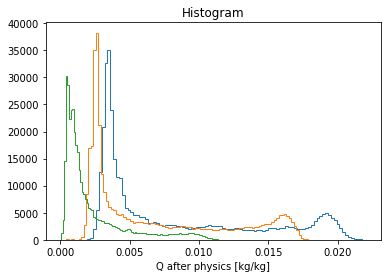

In [42]:
aqua.QAP.isel(lev=29).plot(bins=100, histtype='step');
aqua.QAP.isel(lev=25).plot(bins=100, histtype='step');
aqua.QAP.isel(lev=20).plot(bins=100, histtype='step');

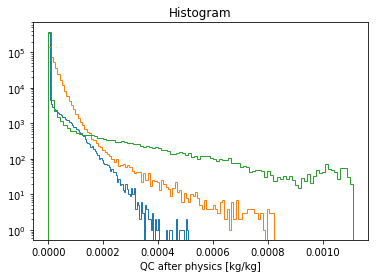

In [48]:
aqua.QCAP.isel(lev=20).plot(bins=100, histtype='step');
aqua.QCAP.isel(lev=25).plot(bins=100, histtype='step');
aqua.QCAP.isel(lev=29).plot(bins=100, histtype='step');
plt.yscale('log')

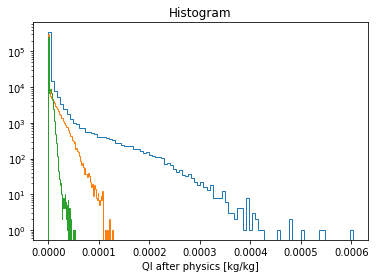

In [44]:
aqua.QIAP.isel(lev=15).plot(bins=100, histtype='step');
aqua.QIAP.isel(lev=20).plot(bins=100, histtype='step');
aqua.QIAP.isel(lev=25).plot(bins=100, histtype='step');
plt.yscale('log')

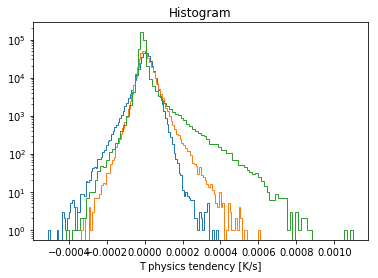

In [45]:
aqua.TPHYSTND.isel(lev=29).plot(bins=100, histtype='step');
aqua.TPHYSTND.isel(lev=25).plot(bins=100, histtype='step');
aqua.TPHYSTND.isel(lev=20).plot(bins=100, histtype='step');
plt.yscale('log')

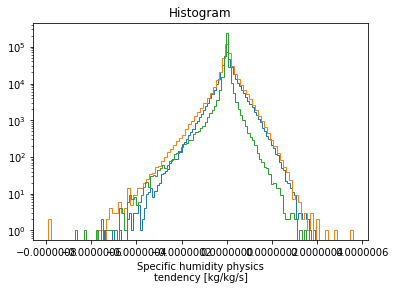

In [46]:
aqua.PHQ.isel(lev=29).plot(bins=100, histtype='step');
aqua.PHQ.isel(lev=25).plot(bins=100, histtype='step');
aqua.PHQ.isel(lev=20).plot(bins=100, histtype='step');
plt.yscale('log')

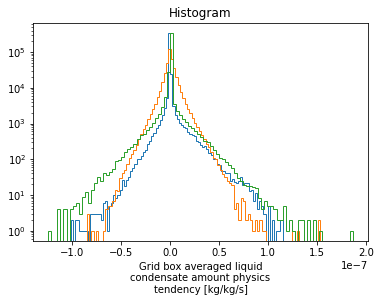

In [47]:
aqua.PHCLDLIQ.isel(lev=29).plot(bins=100, histtype='step');
aqua.PHCLDLIQ.isel(lev=25).plot(bins=100, histtype='step');
aqua.PHCLDLIQ.isel(lev=20).plot(bins=100, histtype='step');
plt.yscale('log')

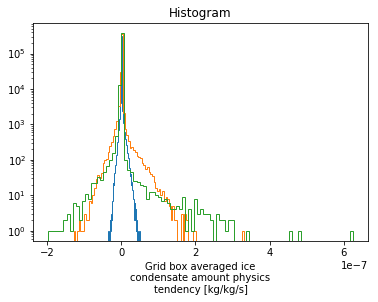

In [49]:
aqua.PHCLDICE.isel(lev=20).plot(bins=100, histtype='step');
aqua.PHCLDICE.isel(lev=15).plot(bins=100, histtype='step');
aqua.PHCLDICE.isel(lev=10).plot(bins=100, histtype='step');
plt.yscale('log')

So some of the distributions, particularly those of the moisture variables and the tendencies are very skewed. What does a PCA do?

## PCA

In [54]:
# Flatten the datasets
def stack(da):
    return da.stack(sample=('time', 'lat', 'lon')).T

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=20, whiten=True)

In [57]:
TAP = stack(aqua.TAP)

In [58]:
TAP.shape

(393216, 30)

In [59]:
pca.fit(TAP)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [61]:
pca.explained_variance_, pca.explained_variance_.shape

(array([2.71550984e+03, 2.28931539e+03, 6.40118154e+01, 4.57540735e+01,
        2.30742571e+01, 8.47851239e+00, 7.53398713e+00, 6.07375291e+00,
        4.74430146e+00, 3.62226358e+00, 2.77181408e+00, 2.54198451e+00,
        1.98999084e+00, 1.56152200e+00, 1.25105079e+00, 9.93007960e-01,
        6.38287936e-01, 4.72246815e-01, 3.33638483e-01, 2.14365829e-01]),
 (20,))

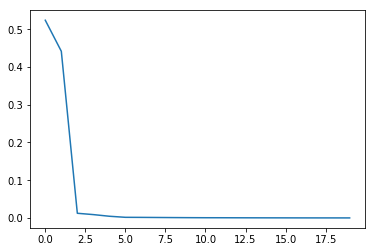

In [63]:
plt.plot(pca.explained_variance_ratio_)

In [64]:
out = pca.transform(TAP)

In [65]:
out.shape

(393216, 20)

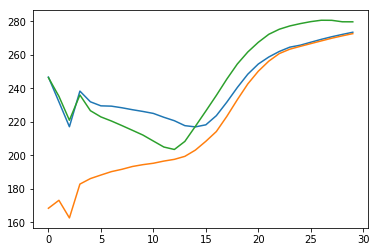

In [73]:
plt.plot(TAP[0])
plt.plot(TAP[-1])
plt.plot(TAP[2000])

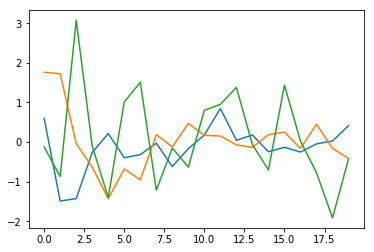

In [74]:
plt.plot(out[0])
plt.plot(out[-1])
plt.plot(out[2000])

(0, 1.1)

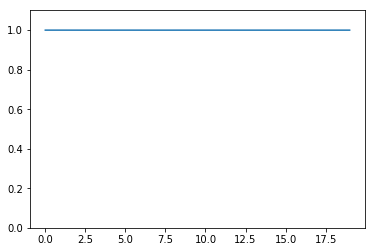

In [78]:
plt.plot(np.std(out, axis=0))
plt.ylim(0,1.1)

(-1, 1)

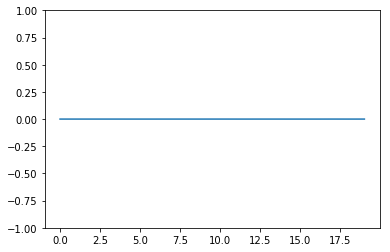

In [79]:
plt.plot(np.mean(out, axis=0))
plt.ylim(-1, 1)

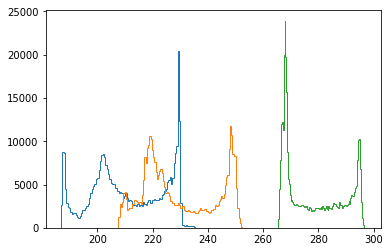

In [83]:
plt.hist(TAP[:,5], histtype='step', bins=100)
plt.hist(TAP[:,15], histtype='step', bins=100)
plt.hist(TAP[:,25], histtype='step', bins=100);

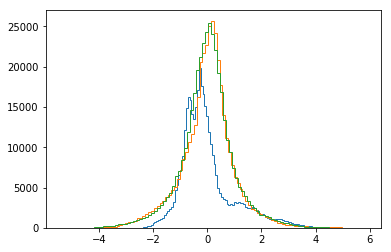

In [84]:
plt.hist(out[:,3], histtype='step', bins=100)
plt.hist(out[:,12], histtype='step', bins=100)
plt.hist(out[:,18], histtype='step', bins=100);

### Now the same for a very skewed variable

In [85]:
PHCLDICE = stack(aqua.PHCLDICE)

In [128]:
pca = PCA(n_components=20, whiten=True)

In [129]:
pca.fit(PHCLDICE)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [89]:
pca.explained_variance_, pca.explained_variance_.shape

(array([6.93341244e-17, 4.44186442e-17, 2.41499854e-17, 1.58566725e-17,
        1.15680246e-17, 8.85033504e-18, 7.56227369e-18, 6.53741085e-18,
        5.44509401e-18, 4.55839081e-18, 3.80416230e-18, 3.10111324e-18,
        2.59996707e-18, 2.00732788e-18, 1.73090796e-18, 1.13225273e-18,
        9.82088258e-19, 4.08116822e-19, 3.34551154e-19, 3.58173563e-20]),
 (20,))

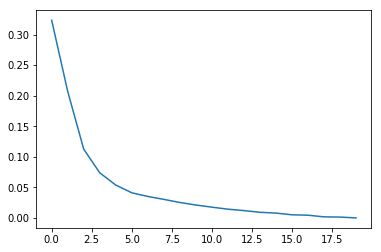

In [90]:
plt.plot(pca.explained_variance_ratio_)

In [91]:
np.sum(pca.explained_variance_ratio_)

0.9999453844918141

In [92]:
out = pca.transform(PHCLDICE)

In [95]:
np.argmax(np.std(PHCLDICE, axis=0))

<xarray.DataArray 'PHCLDICE' ()>
array(14)

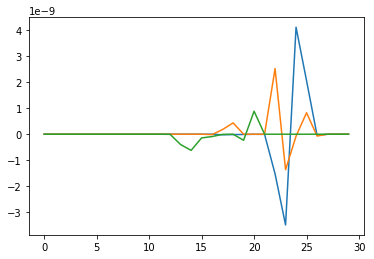

In [96]:
plt.plot(PHCLDICE[14])
plt.plot(PHCLDICE[-1])
plt.plot(PHCLDICE[2000])

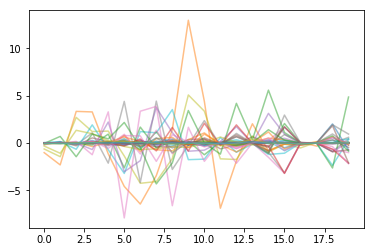

In [102]:
for i in np.random.randint(0, 30000, 50):
    plt.plot(out[i], alpha=0.5)

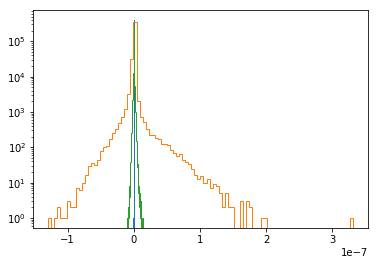

In [105]:
plt.hist(PHCLDICE[:,5], histtype='step', bins=100)
plt.hist(PHCLDICE[:,15], histtype='step', bins=100)
plt.hist(PHCLDICE[:,25], histtype='step', bins=100);
plt.yscale('log')

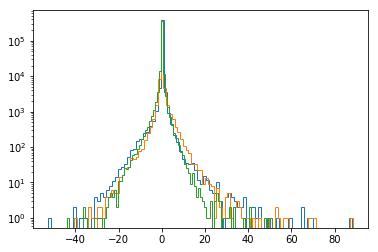

In [109]:
plt.hist(out[:,1], histtype='step', bins=100)
plt.hist(out[:,2], histtype='step', bins=100)
plt.hist(out[:,3], histtype='step', bins=100);
plt.yscale('log')

In [111]:
z = pca.transform(np.zeros((1, 30)))

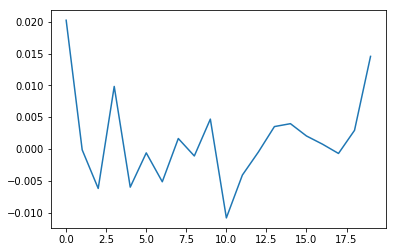

In [113]:
plt.plot(z[0])

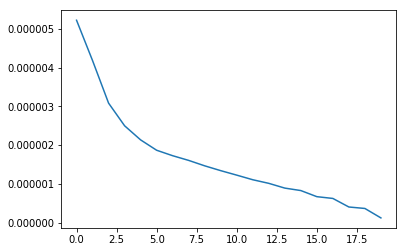

In [115]:
plt.plot(pca.singular_values_)

## What about a vector of several variables.

In [118]:
COMB = xr.concat([TAP, PHCLDICE], dim='lev')

In [119]:
COMB

<xarray.DataArray 'TAP' (sample: 393216, lev: 60)>
array([[ 2.466790e+02,  2.319186e+02,  2.170654e+02, ..., -1.869298e-18,
         0.000000e+00,  0.000000e+00],
       [ 2.466866e+02,  2.319197e+02,  2.170796e+02, ..., -1.206056e-17,
         0.000000e+00,  0.000000e+00],
       [ 2.466940e+02,  2.319225e+02,  2.170972e+02, ..., -5.501986e-17,
         0.000000e+00,  0.000000e+00],
       ...,
       [ 1.683953e+02,  1.731068e+02,  1.626097e+02, ..., -1.001770e-13,
        -2.086496e-14, -4.710523e-16],
       [ 1.684097e+02,  1.731336e+02,  1.626327e+02, ..., -1.166630e-13,
        -1.794475e-14, -4.051984e-16],
       [ 1.684225e+02,  1.731592e+02,  1.626545e+02, ..., -6.923426e-13,
        -1.497806e-14, -3.383905e-16]], dtype=float32)
Coordinates:
  * sample   (sample) MultiIndex
  - time     (sample) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
  - lat      (sample) float64 -87.86 -87.86 -87.86 ... -87.86 -87.86 -87.86
  - lon      (sample) float64 0.0 2.812 5.625 8.4

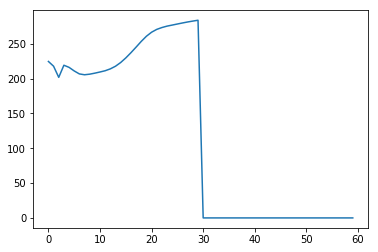

In [124]:
plt.plot(COMB.mean('sample'))

So this vector now has very different scales. What if we apply PCA to the entire vector.

In [125]:
pca = PCA(40, whiten=True)

In [126]:
pca.fit(COMB)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

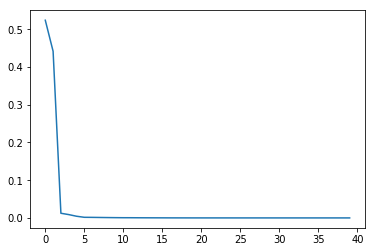

In [127]:
plt.plot(pca.explained_variance_ratio_)

Nope that cannot work. The scale of the original data matters! So all variables need to have their own PCA.

## Convert to an affine function

y = Ax + b

In [128]:
pca = PCA(n_components=20, whiten=True)

In [129]:
pca.fit(PHCLDICE)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [130]:
Ab = pca.transform(np.eye(30))

In [132]:
b = pca.transform(np.zeros((1, 30)))

In [135]:
Ab.shape, b.shape

((30, 20), (1, 20))

In [139]:
A = Ab - b; A.shape

(30, 20)

In [141]:
out2 = np.matmul(PHCLDICE, A) + b

In [142]:
out2.shape

(393216, 20)

In [143]:
out = pca.transform(PHCLDICE)

In [144]:
out[0][0], out2[0][0]

(0.020247875, 0.020247876431133023)

## What about data augmentation in PCA space?

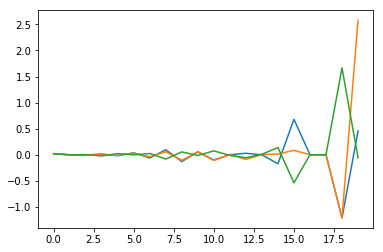

In [147]:
plt.plot(out[:3].T);

In [148]:
re = pca.inverse_transform(out)

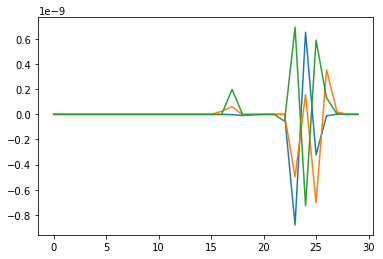

In [149]:
plt.plot(re[:3].T);

In [158]:
aug = out + np.random.normal(0, 0.05, out.shape)

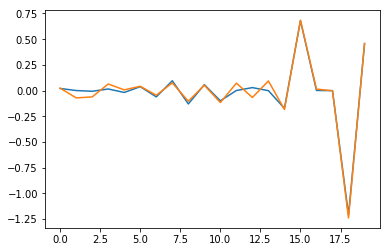

In [159]:
plt.plot(out[0])
plt.plot(aug[0])

In [160]:
re_aug = pca.inverse_transform(aug)

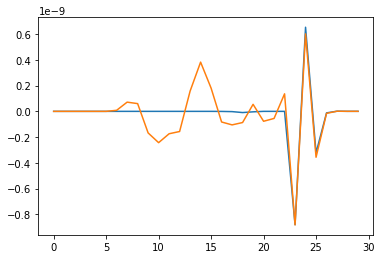

In [161]:
plt.plot(re[0])
plt.plot(re_aug[0])

Ok, so that is not such a good idea... What about multiplicative?

In [162]:
aug = out + out * np.random.normal(0, 0.1, out.shape)

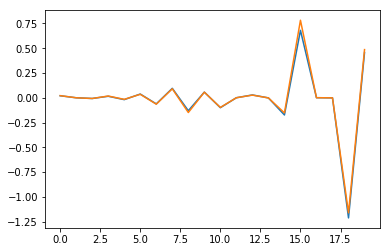

In [163]:
plt.plot(out[0])
plt.plot(aug[0])

In [164]:
re_aug = pca.inverse_transform(aug)

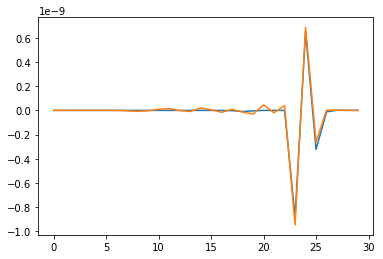

In [165]:
plt.plot(re[0])
plt.plot(re_aug[0])

Also not really better. Plus this obviously violates energy conservation and also some physical laws. 

BUT: Maybe this is still a good idea (noise in some way) to make the network more robust online. Potentially, taking fewer PCs could also be a good stabilizer.

## Conclusion

I think this way of normalizing is pretty potent. It takes away a lot of the arbitrariness. Also, weighing by the eigenvalues is proposed here: https://link.springer.com/chapter/10.1007%2F978-3-642-10677-4_39

For input normalization there probably isn't any harm in just using this one-size-fits-all method. In fact, this would make sure that I don't have to divide by very small values.

BUT: For the output values maybe we want to scale the loss function by some physical component. For example, how do you scale 2D and 3D variables.

Dimensionality aspect: I could still have the loss in energy space but use PCA to reduce the dimensionality. See analysis for PHCLDICE below. Here I would need quite a few. 

Final word: Implement the options in the preprocessing and network!

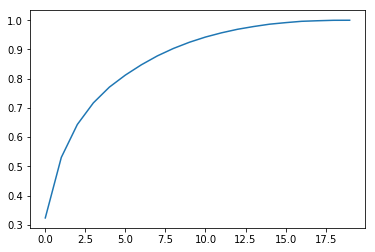

In [166]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))